<a href="https://colab.research.google.com/github/M-torki/CSNN/blob/master/Patch_PowerSpectrum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [ ]:
cd /gdrive/My\ Drive/

/gdrive/My Drive


In [ ]:
!pip install healpy

     |████████████████████████████████| 11.8MB 4.7MB/s 


In [ ]:
import os
import numpy as np
import pylab as plt
from glob import glob
import matplotlib as mpl
import sys
import shutil
import argparse
import healpy as hp
# from ccgpack import sky2patch,ch_mkdir,pop_percent,download

##Mask Definition:
patch-size=512

In [ ]:
# nside = 2048
# psize = 512

# npatch = int(12*nside**2/(psize**2))
# print(npatch)
# mask = np.zeros((npatch,psize,psize))
# i = np.random.randint(0,npatch)
# # mask[i] += np.ones((psize , psize))
# mask[i] += 1
# print(i , mask.shape )
# mask = mask.reshape(npatch*psize*psize)
# print(mask.shape)
# hp.mollview(mask, title='Mask map')
# hp.graticule()

In [ ]:
nside = 2048
phi1 = 30
t1 = 40

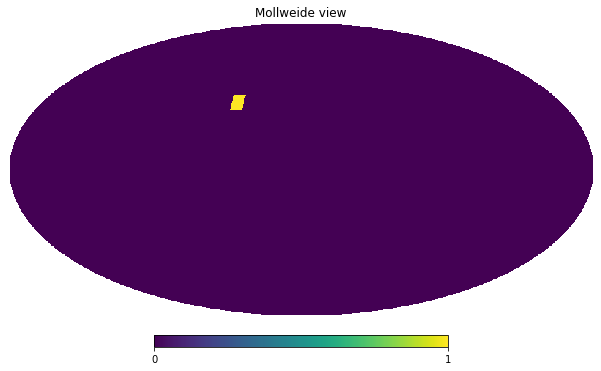

In [ ]:
mask = np.zeros(hp.nside2npix(nside), dtype=np.bool)
pixel_theta, pixel_phi = hp.pix2ang(nside, np.arange(hp.nside2npix(nside)),lonlat=1)
mask[(phi1<=pixel_phi) & (pixel_phi<=phi1+8.3) & (t1<=pixel_theta) & (pixel_theta<=t1+8.3) ] = 1
hp.mollview(mask)

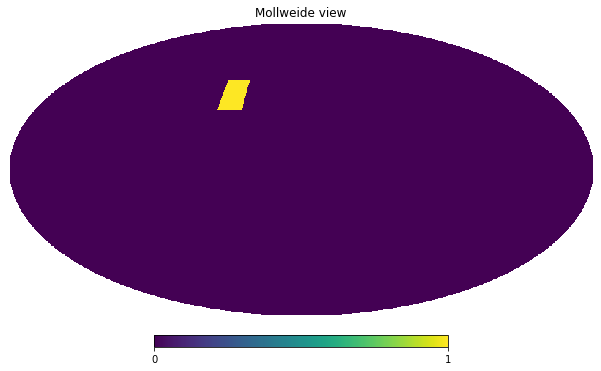

In [ ]:
mask = np.zeros(hp.nside2npix(nside), dtype=np.bool)
pixel_theta, pixel_phi = hp.pix2ang(nside, np.arange(hp.nside2npix(nside)),lonlat=1)
mask[(phi1<=pixel_phi) & (pixel_phi<=phi1+16.6) & (t1<=pixel_theta) & (pixel_theta<=t1+16.6) ] = 1
hp.mollview(mask)

In [ ]:
np.sum(mask)/512**2

1.0022430419921875

#String 2048:

/usr/local/lib/python3.6/dist-packages/healpy/fitsfunc.py:352: UserWarning: If you are not specifying the input dtype and using the default np.float64 dtype of read_map(), please consider that it will change in a future version to None as to keep the same dtype of the input file: please explicitly set the dtype if it is important to you.
  "If you are not specifying the input dtype and using the default "


NSIDE = 2048
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


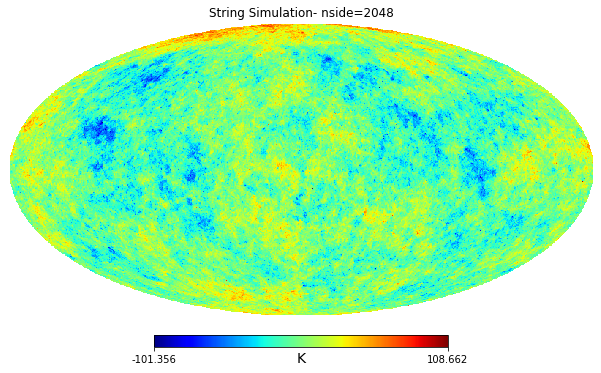

In [ ]:
string = hp.read_map('./data/string/map1n_allz_rtaapixlw_2048_1.fits'.format(nside) , nest=0)
hp.mollview(string , cmap='jet', unit='K' , title='String Simulation- nside=2048')
# plt.savefig('string2048.pdf')

In [ ]:
np.std(string)

18.40509860851169

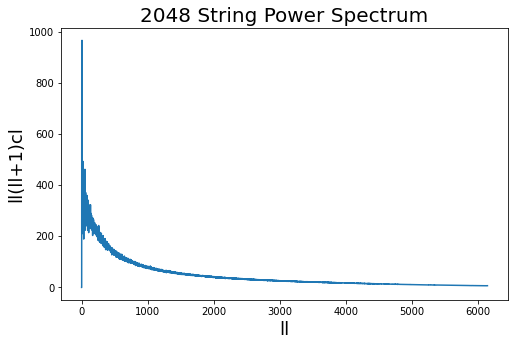

In [ ]:
cl_s = hp.anafast(string)
ll_s = np.arange(len(cl_s))

plt.figure(figsize=(8,5))
plt.title('2048 String Power Spectrum' ,fontsize=20)
plt.xlabel('ll' , fontsize=18)
plt.ylabel('ll(ll+1)cl' , fontsize=18)
plt.plot(ll_s, ll_s*(ll_s+1) *cl_s)
plt.savefig('string-power.pdf')

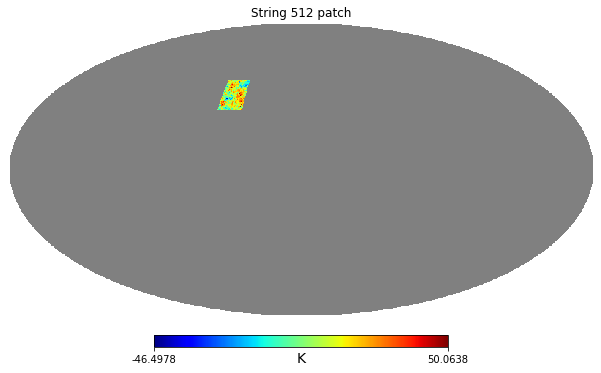

In [ ]:
st_masked = hp.ma(string)
st_masked.mask = np.logical_not(mask)
hp.mollview(st_masked , title='String 512 patch' , cmap='jet' , unit='K')
# plt.savefig('string512patch.pdf')

In [ ]:
np.std(st_masked)

13.037795405443728

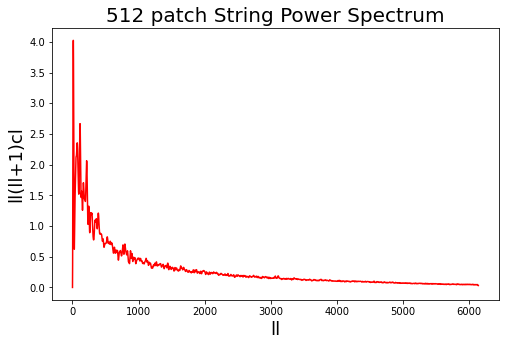

In [ ]:
cl_sp = hp.anafast(st_masked)
ll_sp = np.arange(len(cl_sp))

plt.figure(figsize=(8,5))
plt.title('512 patch String Power Spectrum' ,fontsize=20)
plt.xlabel('ll' , fontsize=18)
plt.ylabel('ll(ll+1)cl' , fontsize=18)
plt.plot(ll_sp, ll_sp*(ll_sp+1) *cl_sp , 'r')
plt.savefig('stringpatch-power.pdf')

In [ ]:
max(ll_s*(ll_s+1) *cl_s)/max(ll_sp*(ll_sp+1) *cl_sp)

239.97286768349804

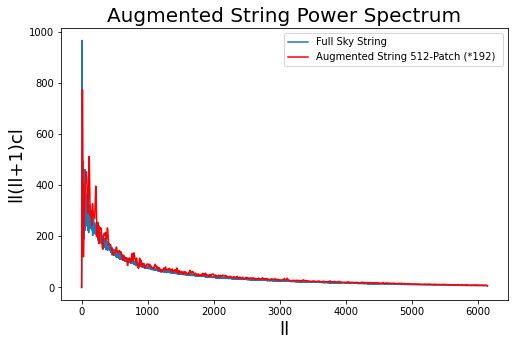

In [ ]:
plt.figure(figsize=(8,5))

plt.title('Augmented String Power Spectrum' ,fontsize=20)
plt.xlabel('ll' , fontsize=18)
plt.ylabel('ll(ll+1)cl' , fontsize=18)
plt.plot(ll_s, ll_s*(ll_s+1) *cl_s , label='Full Sky String')
plt.plot(ll_sp, ll_sp*(ll_sp+1) *cl_sp*192 , 'r' , label='Augmented String 512-Patch (*192) ')
plt.legend()
plt.savefig('str_aug.pdf')

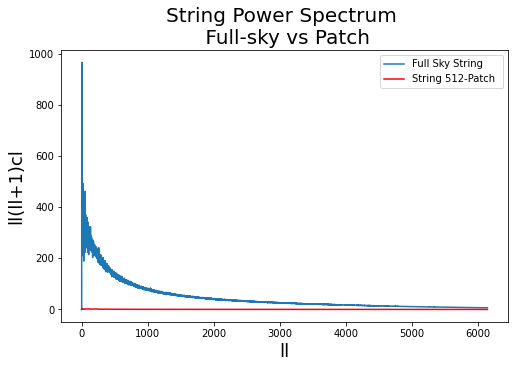

In [ ]:
plt.figure(figsize=(8,5))

plt.title('String Power Spectrum \n Full-sky vs Patch' ,fontsize=20)
plt.xlabel('ll' , fontsize=18)
plt.ylabel('ll(ll+1)cl' , fontsize=18)
plt.plot(ll_s, ll_s*(ll_s+1) *cl_s , label='Full Sky String')
plt.plot(ll_sp, ll_sp*(ll_sp+1) *cl_sp , 'r' , label='String 512-Patch ')
plt.legend()
plt.savefig('str_vs.pdf')

##2048 Healpix Simulation , FWHM=5 arcmin

/usr/local/lib/python3.6/dist-packages/healpy/fitsfunc.py:352: UserWarning: If you are not specifying the input dtype and using the default np.float64 dtype of read_map(), please consider that it will change in a future version to None as to keep the same dtype of the input file: please explicitly set the dtype if it is important to you.
  "If you are not specifying the input dtype and using the default "


NSIDE = 2048
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


Text(0.5, 1.0, 'Healpix CMB Simulation- nside:2048 , FWHM:5')

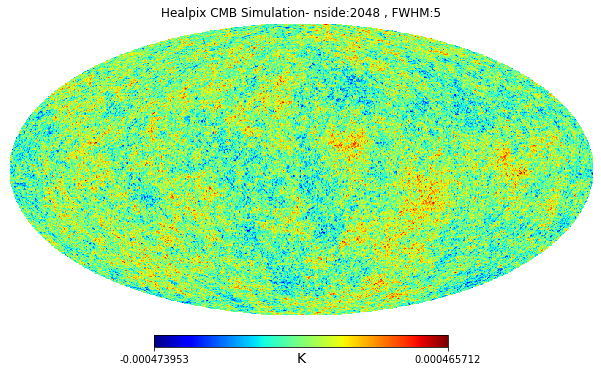

In [ ]:
tot = hp.read_map('./Healpix sims/map_{}_0.fits'.format(nside) , nest=0) * 1e-6
hp.mollview(tot, title='Unmasked 2048 SImulation- fwhm:5',cmap='jet' , unit='K')
plt.title('Healpix CMB Simulation- nside:2048 , FWHM:5')
# plt.savefig('tot.pdf')

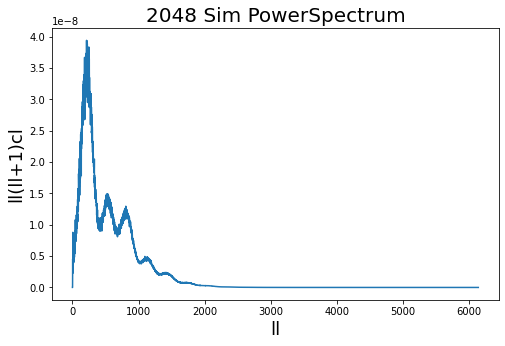

In [ ]:
# cl = hp.anafast(tot)
cl = np.load('./Healpix sims/cl_cmb2048.npy')
ll = np.arange(len(cl))

plt.figure(figsize=(8,5))
plt.title('2048 Sim PowerSpectrum' ,fontsize=20)
plt.xlabel('ll' , fontsize=18)
plt.ylabel('ll(ll+1)cl' , fontsize=18)
plt.plot(ll, ll*(ll+1) *cl)
# plt.savefig('tot-power.pdf')

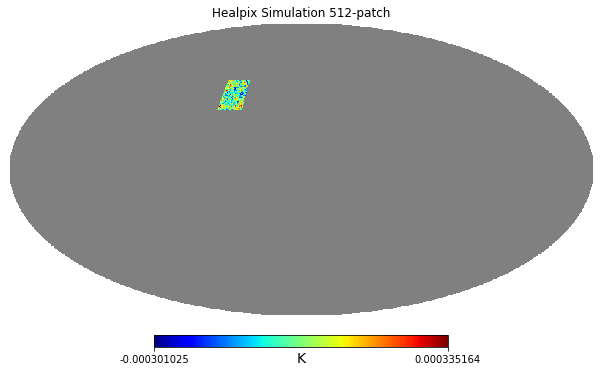

In [ ]:
tot_masked = hp.ma(tot)
tot_masked.mask = np.logical_not(mask)
hp.mollview(tot_masked , title='Healpix Simulation 512-patch' , cmap='jet' , unit='K')
plt.savefig('512patch.pdf')

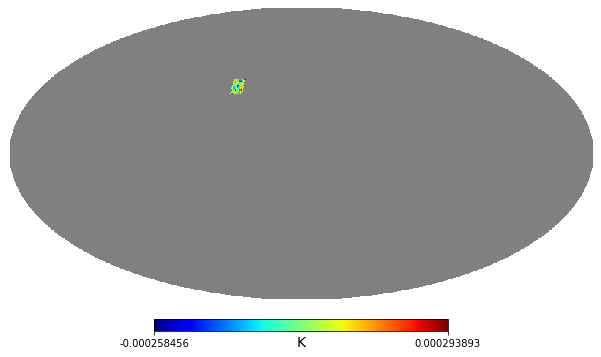

In [ ]:
tot_masked = hp.ma(tot)
tot_masked.mask = np.logical_not(mask)
hp.mollview(tot_masked , title='' , cmap='jet' , unit='K')
plt.savefig('256patch.pdf')

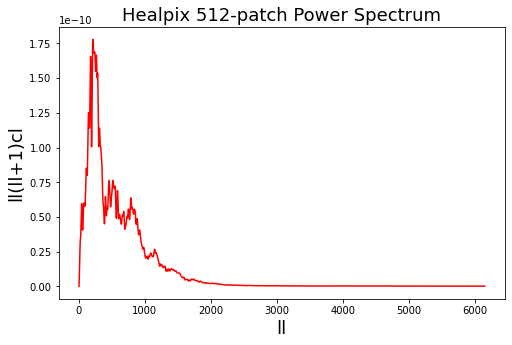

In [ ]:
cl_m = hp.anafast(tot_masked.filled()  )
ll_m = np.arange(len(cl_m))

plt.figure(figsize=(8,5))
plt.title('Healpix 512-patch Power Spectrum' ,fontsize=18)
plt.xlabel('ll' , fontsize=18)
plt.ylabel('ll(ll+1)cl' , fontsize=18)
plt.plot(ll_m, ll_m*(ll_m+1) *cl_m , 'r')
plt.savefig('512p-power.pdf')

In [ ]:
np.std(tot)

0.0001069402013199551

In [ ]:
np.std(tot_masked)

0.00010219774253981487

In [ ]:
max(ll*(ll+1) *cl)/max(ll_m*(ll_m+1) *cl_m)

221.3813376220892

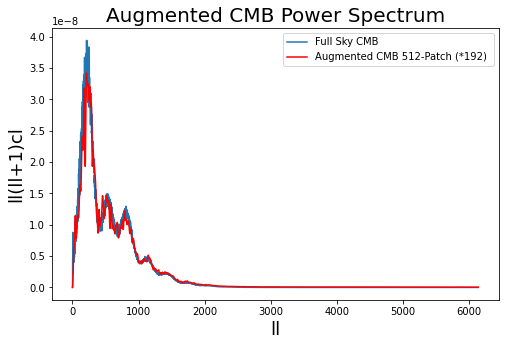

In [ ]:
plt.figure(figsize=(8,5))

plt.title('Augmented CMB Power Spectrum' ,fontsize=20)
plt.xlabel('ll' , fontsize=18)
plt.ylabel('ll(ll+1)cl' , fontsize=18)
plt.plot(ll, ll*(ll+1) *cl , label='Full Sky CMB')
plt.plot(ll_m, ll_m*(ll_m+1) *cl_m*192 , 'r' , label='Augmented CMB 512-Patch (*192) ')
plt.legend()
plt.savefig('cmb_aug.pdf')

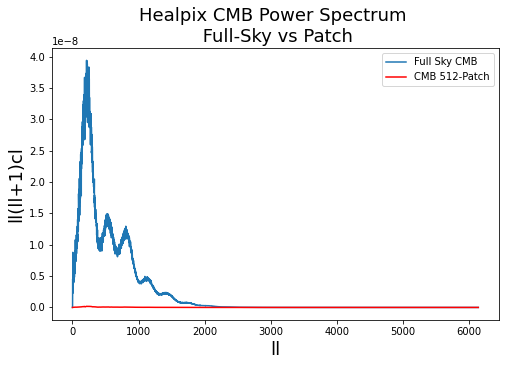

In [ ]:
plt.figure(figsize=(8,5))

plt.title('Healpix CMB Power Spectrum \n Full-Sky vs Patch' ,fontsize=18)
plt.xlabel('ll' , fontsize=18)
plt.ylabel('ll(ll+1)cl' , fontsize=18)
plt.plot(ll, ll*(ll+1) *cl , label='Full Sky CMB')
plt.plot(ll_m, ll_m*(ll_m+1) *cl_m , 'r' , label='CMB 512-Patch')
plt.legend()
plt.savefig('fullvspatch.pdf')

In [ ]:
np.save('./Healpix sims/cl_cmb2048.npy' , cl)
np.save('./Healpix sims/cl_cmb512p.npy' , cl_m)
np.save('./Healpix sims/cl_str2048.npy' , cl_s)
np.save('./Healpix sims/cl_str512p.npy' , cl_sp)

In [ ]:
# ro_cr = 3*(68**2)/(8*np.pi*6.67*(10**-11))
ro_cr = 1
ro0_m = 0.3 * ro_cr
ro0_r = 1e-4 * ro_cr
ro0_de = 0.7 * ro_cr
print(ro_cr , ro0_r ,ro0_m , ro0_de)

1 0.0001 0.3 0.7


In [ ]:
1/(1+3400)

0.00029403116730373417

In [ ]:
1/(1+0.4)

0.7142857142857143

In [ ]:
a = np.arange(0 , stop=1 ,step=1e-3)
a = a[1:]

In [ ]:
a.shape

(999,)

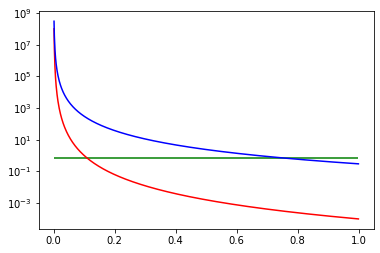

In [ ]:
plt.plot(a , ro0_r * a**(-4) , 'r')
plt.plot(a , ro0_m * a**(-3) , 'b')
plt.hlines(ro0_de ,xmin=a[0] , xmax=a[-1] , colors='g')
# plt.t/ext()
# plt.ylim(0,1e10)
plt.yscale('log')
# plt.xscale('log')

In [ ]:
a[ro0_r * a**-4 == ro0_m*a**-3]

NameError: ignored